In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:

data = pd.read_csv(r'C:\Users\chabh\OneDrive\Desktop\code\ds-final project\diabetes.csv')



In [18]:
type(data)

pandas.core.frame.DataFrame

In [19]:

feature_columns = ['Age','Glucose', 'BloodPressure', 'Insulin', 'BMI','DiabetesPedigreeFunction']  
target_column ='Outcome'  # here outcome means to be positive (1)



In [20]:
X = data[feature_columns]  # Feature set
y = data[target_column].apply(lambda x: 'Outcome' if x == 1 else 'Not Outcome')  
#outcome=diabetic
#not outcome = non diabetic 

In [21]:
# Display dataset information
print("Dataset Shape:", data.shape)
print("Sample Data:\n", data.head())
print("Target Distribution:\n", y.value_counts())

Dataset Shape: (768, 9)
Sample Data:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Target Distribution:
 Outcome
Not Outcome    500
Outcome        268
Name: count, dtype: int64


In [22]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Standardize the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [24]:
# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)  # k-NN classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)  # Decision Tree classifier


In [25]:
# Train and predict with k-NN
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


In [26]:
# Train and predict with Decision Tree
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [27]:
# Calculate accuracies
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

In [28]:
# Ensure consistency: Define accuracies for the bar plot
accuracies = {
    "k-Nearest Neighbors": accuracy_knn,
    "Decision Tree": accuracy_dt
}


In [29]:
# Print accuracies
print("\nModel Accuracies:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.2f}")


Model Accuracies:
k-Nearest Neighbors: 0.71
Decision Tree: 0.75


In [30]:
# Bar chart comparing model accuracies
barplot_data = pd.DataFrame({
    'Model': list(accuracies.keys()),
    'Accuracy': list(accuracies.values())
})


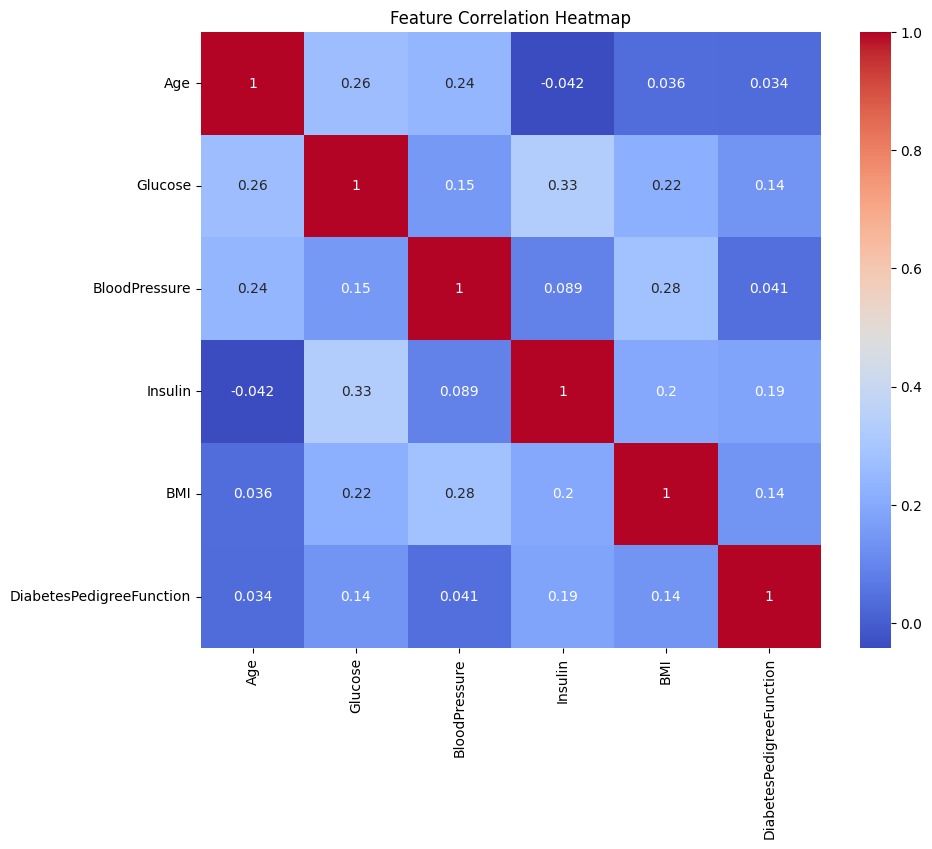

In [32]:
# Heatmap of feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data[feature_columns].corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [4]:
barplot_data = pd.DataFrame({
    'Model': ['k-Nearest Neighbors', 'Decision Tree'],
    'Accuracy': [accuracy_knn, accuracy_dt]
})


NameError: name 'accuracy_knn' is not defined

In [33]:
# Scatter plot for k-NN predictions
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Unique labels in y_pred_knn: ['Not Outcome' 'Outcome']


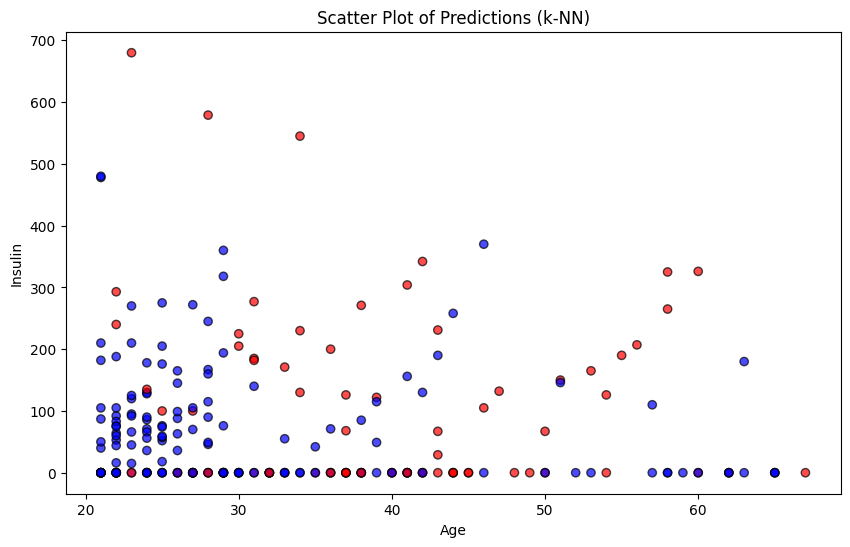

In [34]:
# Print unique labels in y_pred_knn for debugging
print("Unique labels in y_pred_knn:", np.unique(y_pred_knn))

# Correct the color mapping dictionary based on actual labels
color_map_knn = {'Outcome': 'red', 'Not Outcome': 'blue'}  # Match exact labels in y_pred_knn
try:
    pred_colors_knn = [color_map_knn[pred] for pred in y_pred_knn]  # Map predictions to colors
except KeyError as e:
    print(f"KeyError: {e}. Check your color_map_knn keys and labels in y_pred_knn.")
    raise

# Scatter plot using two features
plt.figure(figsize=(10, 6))
plt.scatter(
    X_test[feature_columns[0]], 
    X_test[feature_columns[3]], 
    c=pred_colors_knn, 
    alpha=0.7, 
    edgecolors='k'
)
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[3])
plt.title("Scatter Plot of Predictions (k-NN)")
plt.show()


Unique labels in y_pred_dt: ['Not Outcome' 'Outcome']


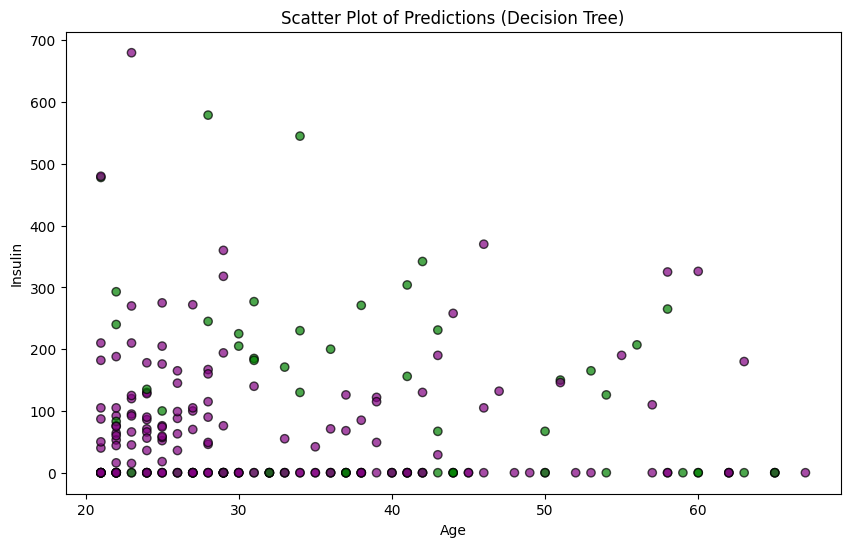

In [35]:
# Print unique labels in y_pred_dt for debugging
print("Unique labels in y_pred_dt:", np.unique(y_pred_dt))

# Correct the color mapping dictionary based on actual labels
color_map_dt = {'Outcome': 'green', 'Not Outcome': 'purple'}  # Match exact labels in y_pred_dt
try:
    pred_colors_dt = [color_map_dt[pred] for pred in y_pred_dt]  # Map predictions to colors
except KeyError as e:
    print(f"KeyError: {e}. Check your color_map_dt keys and labels in y_pred_dt.")
    raise

# Scatter plot for Decision Tree predictions using two selected features
plt.figure(figsize=(10, 6))
plt.scatter(
    X_test[feature_columns[0]], 
    X_test[feature_columns[3]], 
    c=pred_colors_dt, 
    alpha=0.7, 
    edgecolors='k'
)
plt.xlabel(feature_columns[0])
plt.ylabel(feature_columns[3])
plt.title("Scatter Plot of Predictions (Decision Tree)")
plt.show()



In [36]:
# Predict and display multiple samples with actual results
samples_to_predict = X_test.iloc[:15]  # First 5 samples from the test set
scaled_samples = scaler.transform(samples_to_predict)  # Scaled samples for k-NN


In [37]:
# Make predictions for both models
predicted_knn = knn.predict(scaled_samples)
predicted_dt = dt.predict(samples_to_predict)


In [43]:
# Display results


# Load the dataset
df = pd.read_csv(r'C:\Users\chabh\OneDrive\Desktop\code\ds-final project\diabetes.csv')

# Assuming y_test, predicted_knn, and predicted_dt are already defined and have the correct length

print("\nPredictions for Selected Samples:")
print("--------------------------------------------------")
print(f"{'Index':<10}{'Actual':<20}{'k-NN Prediction':<20}{'Decision Tree Prediction'}")

# Iterate over the rows of the DataFrame
for i, row in df.iterrows():
    # Make sure indices are valid and within bounds
    if i >= len(y_test) or i >= len(predicted_knn) or i >= len(predicted_dt):
        break  # Avoid going out of bounds
    
    # Get the actual result from y_test
    actual_result = y_test.iloc[i]  # Assuming y_test is a pandas series or DataFrame

    # Print the predictions for the current sample
    print(f"{i:<10}{actual_result:<20}{predicted_knn[i]:<20}{predicted_dt[i]}")



Predictions for Selected Samples:
--------------------------------------------------
Index     Actual              k-NN Prediction     Decision Tree Prediction
0         Not Outcome         Not Outcome         Not Outcome
1         Not Outcome         Not Outcome         Not Outcome
2         Not Outcome         Not Outcome         Not Outcome
3         Not Outcome         Not Outcome         Not Outcome
4         Not Outcome         Outcome             Not Outcome
5         Not Outcome         Outcome             Not Outcome
6         Not Outcome         Not Outcome         Not Outcome
7         Not Outcome         Outcome             Outcome
8         Not Outcome         Outcome             Not Outcome
9         Not Outcome         Not Outcome         Not Outcome
10        Outcome             Outcome             Not Outcome
11        Not Outcome         Outcome             Outcome
12        Outcome             Not Outcome         Not Outcome
13        Not Outcome         Outcome    

C:\Users\chabh\AppData\Local\Temp\ipykernel_16640\700133694.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=barplot_data, x='Model', y='Accuracy', palette='viridis')


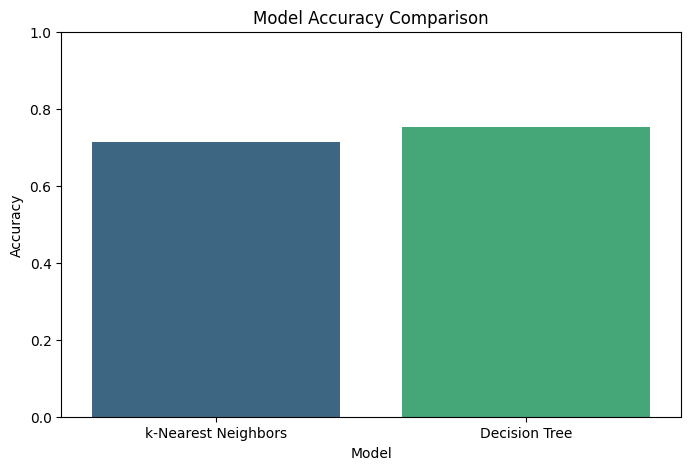

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv(r'C:\Users\chabh\OneDrive\Desktop\code\ds-final project\diabetes.csv')  # <-- Make sure this path is correct

# Select features and target
feature_columns = ['Age','Glucose', 'BloodPressure', 'Insulin', 'BMI','DiabetesPedigreeFunction']
target_column = 'Outcome'

X = data[feature_columns]
y = data[target_column].apply(lambda x: 'Outcome' if x == 1 else 'Not Outcome')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

knn.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test)

# Calculate accuracies
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Create DataFrame for plotting
barplot_data = pd.DataFrame({
    'Model': ['k-Nearest Neighbors', 'Decision Tree'],
    'Accuracy': [accuracy_knn, accuracy_dt]
})

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=barplot_data, x='Model', y='Accuracy', palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
